Vul voor de zekerheid even je naam hieronder in.

Naam: 

**Uitleg opslaan**

Dit is het IDS tentamen van 8 november. Je werkt op de server. Zorg dat als je klaar bent dit document opslaat. Er wordt een automatische kopie van het bestand gemaakt op de eindtijd van het tentamen (voor verlengers wordt een extra kopie na hun eindtijd aangemaakt).

**Uitleg screenshots**

In het tentamen wordt meerdere keren een screenshot van een dataframe gegeven. In de vraag wordt hiernaar verwezen en het is de bedoeling om code te schrijven om dit resultaat te reproduceren. Kijk zelf goed naar de screenshot om te zien welke handelingen er nodig zijn om dit resultaat te kunnen namaken.

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image


**1. We kijken naar de dataset "Residential EV Charging Data" op basis van data uit Noorwegen**

a) Laad de dataset in: "Dataset 1_EV charging reports.csv". Zorg dat de kolom Duration_hours als `float` wordt gezien. Je moet hiervoor iets doen met `decimal =`. 2pt

Een korte uitleg (in het Engels) van de dataset:

"The CSV file “Dataset 1” describes 6,878 individual charging sessions, registered by 97 user
IDs from December 2018 to January 2020. The charging reports include plug-in time, plug-out
time and charged energy per charging session. Each charging session is connected to a user
ID, charger ID and address."

Extra info (in het Engels) over (aantal) kolommen:
* Session ID: Unique ID for EV charging session (N=6878)
* Garage_ID: ID for garage address (N = 24)
* User_ID: ID for user (N=97)
* Duration_hours: connected time in hours (time between plug-in and plug-out)
* El_kwh: Charged energy (kWh)

In [24]:
df = pd.read_csv("Dataset 1_EV charging reports.csv", sep=";", decimal=",")
print(df.dtypes)
df.head

session_ID             int64
Garage_ID             object
User_ID               object
User_type             object
Shared_ID             object
Start_plugin          object
Start_plugin_hour      int64
End_plugout           object
End_plugout_hour     float64
El_kWh               float64
Duration_hours       float64
month_plugin          object
weekdays_plugin       object
Plugin_category       object
Duration_category     object
dtype: object


<bound method NDFrame.head of       session_ID Garage_ID  User_ID User_type Shared_ID      Start_plugin  \
0              1      AdO3   AdO3-4   Private       NaN  21.12.2018 10:20   
1              2      AdO3   AdO3-4   Private       NaN  21.12.2018 10:24   
2              3      AdO3   AdO3-4   Private       NaN  21.12.2018 11:33   
3              4      AdO3   AdO3-2   Private       NaN  22.12.2018 16:15   
4              5      AdO3   AdO3-2   Private       NaN  24.12.2018 22:03   
...          ...       ...      ...       ...       ...               ...   
6873        6874      UT15   UT15-2   Private       NaN  31.01.2020 17:57   
6874        6875     AsO10  AsO10-1   Private       NaN  31.01.2020 18:32   
6875        6876       Bl2    Bl2-1   Private       NaN  31.01.2020 19:25   
6876        6877       UT7    UT7-1   Private       NaN  31.01.2020 19:27   
6877        6878       Bl2  Share-7    Shared  Shared-7  31.01.2020 20:42   

      Start_plugin_hour       End_plugout  En

b) Doe de volgende twee dingen: 
* Gebruik de groupby functie om de mean te krijgen. Zie het voorbeeld van de screenshot hieronder. 1pt
* Je kan hier een foutmelding krijgen. Hoe zorg je ervoor dat je geen foutmelding meer krijgt? (Zorg dat je in de code geen foutmelding meer krijgt. Lukt dat niet kan je gewoon door) 2pt

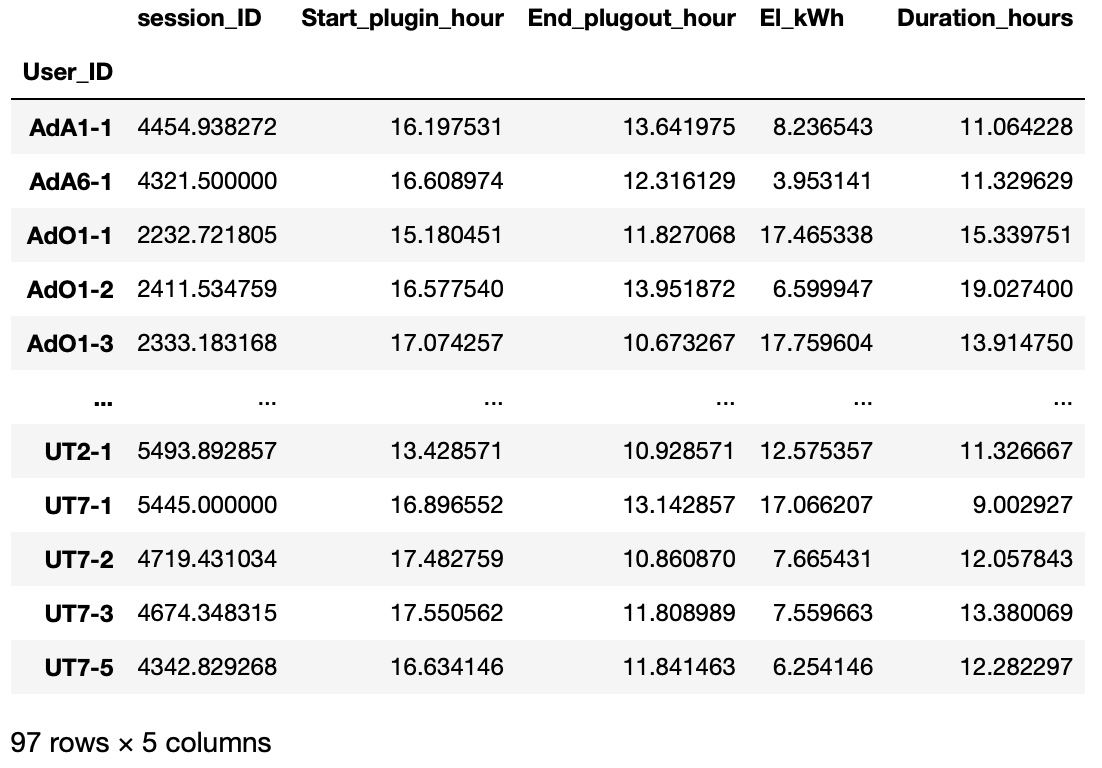

In [3]:
Image(filename='EV_charging_reports_example.png')

In [18]:
dfr = df.groupby("User_ID")[["session_ID","Start_plugin_hour","End_plugout_hour", "El_kWh","Duration_hours"]].mean()
dfr

AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

c) Wat is de top-5 aan users die het hoogste gemiddelde vermogen hebben (vermogen is energie per tijdseenheid bijvoorbeeld kWh per uur)? 4pt

d) Wat is de daadwerkelijke laadtijd gedeeld door de aangesloten tijd (connected) van de auto bij sessie 11? 2pt

We kunnen er hierbij vanuitgaan dat de laadsnelheid 3.6 kW per uur is.

In [25]:
df["(kwh/3.6)/hour"] = (df["El_kWh"] /3.6)/df["Duration_hours"]
df.head()

,session_ID,Garage_ID,User_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,Duration_hours,month_plugin,weekdays_plugin,Plugin_category,Duration_category,(kwh/3.6)/hour
0,1,AdO3,AdO3-4,Private,NaN,21.12.2018 10:20,10,21.12.2018 10:23,10.0,0.30,0.050000,Dec,Friday,late morning (9-12),Less than 3 hours,1.666667
1,2,AdO3,AdO3-4,Private,NaN,21.12.2018 10:24,10,21.12.2018 10:32,10.0,0.87,0.136667,Dec,Friday,late morning (9-12),Less than 3 hours,1.768293
2,3,AdO3,AdO3-4,Private,NaN,21.12.2018 11:33,11,21.12.2018 19:46,19.0,29.87,8.216389,Dec,Friday,late morning (9-12),Between 6 and 9 hours,1.009838
3,4,AdO3,AdO3-2,Private,NaN,22.12.2018 16:15,16,23.12.2018 16:40,16.0,15.56,24.419722,Dec,Saturday,late afternoon (15-18),More than 18 hours,0.176997
4,5,AdO3,AdO3-2,Private,NaN,24.12.2018 22:03,22,24.12.2018 23:02,23.0,3.62,0.970556,Dec,Monday,late evening (21-midnight),Less than 3 hours,1.036062


e) Welke 5 users hebben het meeste kWh geladen in de maand december op zaterdagen? 6pt

* 1pt voor een onderbouwing hoe je dit kan aanpakken (tekstueel!)
* 4pt voor uitwerking
* 1pt voor een uitwerking zonder FutureWarning foutmelding

Antwoord:

In [35]:
filterd_df = df.loc[(df['month_plugin'] == "Dec") & (df['weekdays_plugin'] == "Saturday")]
d = filterd_df.sort_values(by = "El_kWh", ascending = False)
d#filterd_df

,session_ID,Garage_ID,User_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,Duration_hours,month_plugin,weekdays_plugin,Plugin_category,Duration_category,(kwh/3.6)/hour
4991,4992,AdO1,AdO1-4,Private,NaN,14.12.2019 15:22,15,15.12.2019 11:05,11.0,69.87,19.724444,Dec,Saturday,late afternoon (15-18),More than 18 hours,0.983974
5513,5514,AdO1,AdO1-4,Private,NaN,28.12.2019 14:09,14,02.01.2020 06:49,6.0,61.28,112.670556,Dec,Saturday,early afternoon (12-15),More than 18 hours,0.151080
4736,4737,UT9,Share-14,Shared,Shared-12,07.12.2019 21:53,21,08.12.2019 10:12,10.0,58.18,12.325000,Dec,Saturday,late evening (21-midnight),Between 12 and 15 hours,1.311246
5296,5297,SR14,SR14-1,Private,NaN,21.12.2019 20:30,20,22.12.2019 08:37,8.0,46.02,12.115833,Dec,Saturday,early evening (18-21),Between 12 and 15 hours,1.055093
4725,4726,AdO1,AdO1-3,Private,NaN,07.12.2019 16:33,16,08.12.2019 15:51,15.0,44.25,23.301944,Dec,Saturday,late afternoon (15-18),More than 18 hours,0.527495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5286,5287,UT7,UT7-2,Private,NaN,21.12.2019 17:03,17,21.12.2019 17:14,17.0,1.23,0.186111,Dec,Saturday,late afternoon (15-18),Less than 3 hours,1.835821
4709,4710,Bl2,Bl2-5,Private,NaN,07.12.2019 10:44,10,07.12.2019 12:25,12.0,1.20,1.683611,Dec,Saturday,late morning (9-12),Less than 3 hours,0.197987
5509,5510,NR1,NR1-1,Private,NaN,28.12.2019 12:13,12,29.12.2019 11:54,11.0,1.15,23.687222,Dec,Saturday,early afternoon (12-15),More than 18 hours,0.013486
5272,5273,UT1,UT1-1,Private,NaN,21.12.2019 14:39,14,21.12.2019 14:47,14.0,0.45,0.124167,Dec,Saturday,early afternoon (12-15),Less than 3 hours,1.006711


**2. We gebruiken verkeersdrukte data uit Noorwegen op verschillende plekken**

a) importeer de dataset `Dataset 6_Local traffic distribution.csv`

Info over de dataset (in het Engels):

"Local hourly traffic density in 5 nearby traffic locations. The data includes an hourly count of vehicles shorter than 5.6 meter, from December 2018 to January 2020." 

De kolommen zijn dus het aantal voertuigen op verschillende locaties per uur gemeten.

In [39]:
df2 = pd.read_csv("Dataset 6_Local traffic distribution.csv", sep= ";")

print(df2.dtypes)
df2.info()

Date_from                               object
Date_to                                 object
KROPPAN BRU                             object
MOHOLTLIA                               object
SELSBAKK                                object
MOHOLT RAMPE 2                           int64
Jonsvannsveien vest for Steinanvegen     int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10248 entries, 0 to 10247
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Date_from                             10248 non-null  object
 1   Date_to                               10248 non-null  object
 2   KROPPAN BRU                           10248 non-null  object
 3   MOHOLTLIA                             10248 non-null  object
 4   SELSBAKK                              10248 non-null  object
 5   MOHOLT RAMPE 2                        10248 non-null  int64 
 6   Jonsvannsveien v

a) Zorg dat de volgende kolommen worden omgezet naar int: (5pt) 
* KROPPAN BRU                          
* MOHOLTLIA                             
* SELSBAKK  

Hiervoor moet je wat datapunten die nog niet geconverteerd kunnen worden naar int format eerst veranderen.

* 2pt uitzoeken wat er gedaan moet worden (mag tekstueel of in code). 
* 2pt voor omzetten van de specifieke datapunten die geen int format aan kunnen naar iets dat wel omgezet kan worden naar int
* 1pt voor omzetten van de genoemde kolommen naar int format

In [36]:
df2.head()
df2.isna().sum()

Date_from                               0
Date_to                                 0
KROPPAN BRU                             0
MOHOLTLIA                               0
SELSBAKK                                0
MOHOLT RAMPE 2                          0
Jonsvannsveien vest for Steinanvegen    0
dtype: int64

b) Bereken het verschil t.o.v. de vorige waarneming op de locatie `MOHOLT RAMPE 2` (dit kan zonder `a)` gedaan te hebben) (3pt)

In [43]:
verschil = [0]
#for i in range(10248):
#    df2.iloc[i]["MOHOLT RAMPE 2"]
df2["verscil"] = df2["MOHOLT RAMPE 2"].diff()
df2

,Date_from,Date_to,KROPPAN BRU,MOHOLTLIA,SELSBAKK,MOHOLT RAMPE 2,Jonsvannsveien vest for Steinanvegen,verscil
0,01.12.2018 00:00,01.12.2018 01:00,639,0,0,4,144,NaN
1,01.12.2018 01:00,01.12.2018 02:00,487,153,115,21,83,17.0
2,01.12.2018 02:00,01.12.2018 03:00,408,85,75,10,69,-11.0
3,01.12.2018 03:00,01.12.2018 04:00,282,89,56,8,39,-2.0
4,01.12.2018 04:00,01.12.2018 05:00,165,64,34,3,25,-5.0
...,...,...,...,...,...,...,...,...
10243,31.01.2020 19:00,31.01.2020 20:00,1767,704,303,163,464,4.0
10244,31.01.2020 20:00,31.01.2020 21:00,1351,518,228,87,318,-76.0
10245,31.01.2020 21:00,31.01.2020 22:00,1043,420,199,73,256,-14.0
10246,31.01.2020 22:00,31.01.2020 23:00,941,376,160,40,203,-33.0


c) Wat is het drukste moment geweest op alle locaties bij elkaar? 2pt

d) Maak een nieuwe kolom `resultaat'` met de where functie aan waarbij je invult bij een toename van `MOHOLT RAMPE 2`: `1`, bij een afname `-1` en bij een gelijkgebleven aantal `0`. 3pt

Maak de volgende dataframe om te laten zien op welke uren van de dag er vaker een toename is dan een afname? 4pt

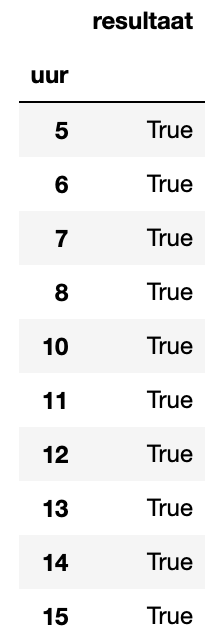

In [19]:
Image(filename='Toename_traffic_data_example.png')


In [ ]:
toename = []


SyntaxError: invalid syntax (902008371.py, line 1)

**3. We maken voor deze vraag gebruik van de NBA (basketbal in de Verenigde Staten) statistieken van zowel het reguliere seizoen als de play-offs**

a) Importeer de file `2022_2023_NBA_Player_Stats_Regular.csv` en noem deze dataframe "NBA_reg". Gebruik encoding='latin-1'. (1pt)

In [47]:
NBA_reg = pd.read_csv("2022_2023_NBA_Player_Stats_Regular.csv", encoding='latin-1', sep= ";")
NBA_reg


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,...,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
675,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,...,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
676,537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,...,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4
677,538,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,...,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5


b) In het basketbal zijn statistieken enorm belangrijk. Maak een top-5 van de spelers met de meeste assists per wedstrijd ('AST' kolom) (2pt)

In [48]:
print(NBA_reg.sort_values(by = "AST", ascending = False))

      Rk             Player Pos  Age   Tm   G  GS    MP   FG   FGA  ...  \
245  190       James Harden  PG   33  PHI  58  58  36.8  6.4  14.5  ...   
239  186  Tyrese Haliburton  PG   22  IND  56  56  33.6  7.4  15.0  ...   
675  536         Trae Young  PG   24  ATL  73  73  34.8  8.2  19.0  ...   
318  249       Nikola Joki?   C   27  DEN  69  69  33.7  9.4  14.8  ...   
158  123  Spencer Dinwiddie  PG   29  BRK  26  26  35.3  5.5  13.7  ...   
..   ...                ...  ..  ...  ...  ..  ..   ...  ...   ...  ...   
127   98    Chance Comanche   C   26  POR   1   0  21.0  3.0   5.0  ...   
113   87  Julian Champagnie  SF   21  PHI   2   0   3.5  0.0   1.0  ...   
613  482      Stanley Umude  SG   23  DET   1   0   2.0  0.0   1.0  ...   
98    73      Deonte Burton  SG   29  SAC   2   0   3.0  0.0   1.0  ...   
652  515   Alondes Williams  SG   23  BRK   1   0   5.0  0.0   0.0  ...   

       FT%  ORB  DRB   TRB   AST  STL  BLK  TOV   PF   PTS  
245  0.867  0.7  5.4   6.1  10.7  1.2 

c) 'Is eruitgehaald'

Importeer de file `2022_2023_NBA_Player_Stats_Playoffs.csv` en noem deze dataframe "NBA_PO". Gebruik encoding='latin-1'.

d) Merge de dataframes NBA_reg en NBA_PO en gebruik hierbij suffixes = *('_reg', '_PO')* en maak een selectie om op de dataset uit de volgende screenshot te komen (na dit datafame.head(10) te laten zien) 

* 2pt voor merge
* 2pt voor selectie maken en laten zien


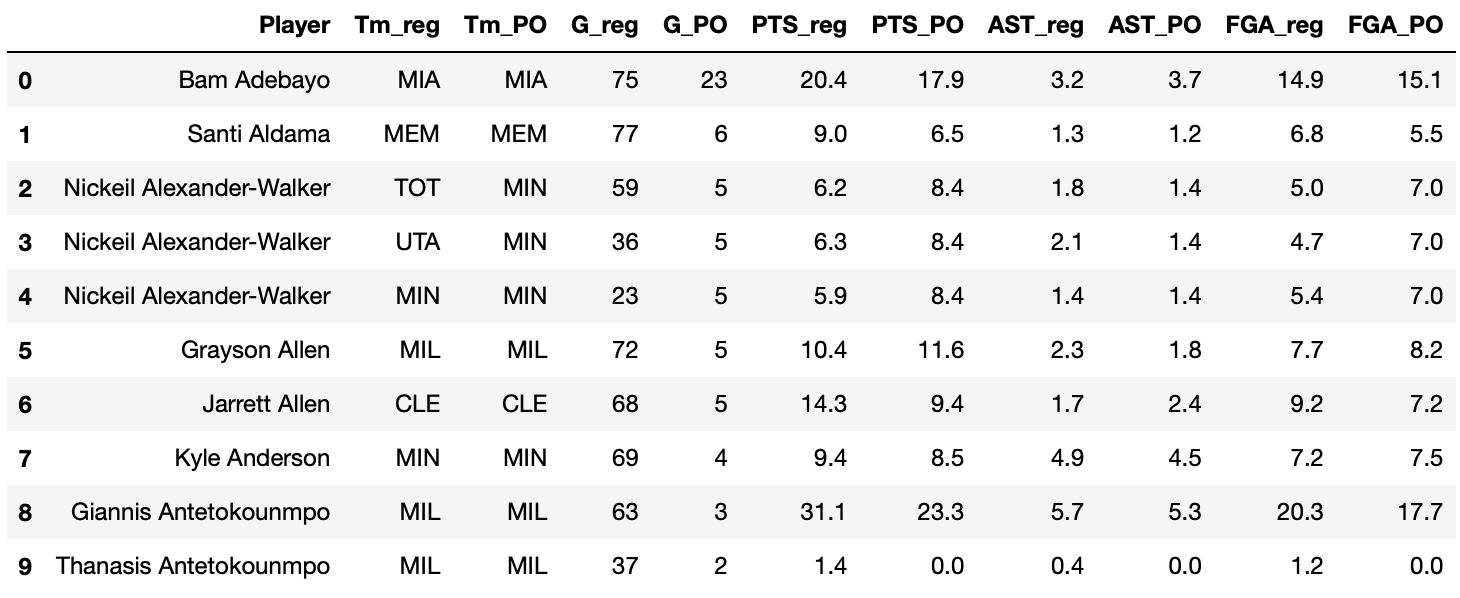

In [31]:
Image(filename='NBA_dataframe_example.png')

In [51]:
NBA_PO = pd.read_csv("2022_2023_NBA_Player_Stats_Playoffs.csv",encoding='latin-1',sep=";")
NBA_PO

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Bam Adebayo,C,25,MIA,23,23,37.0,7.3,15.1,...,0.821,2.7,7.1,9.9,3.7,0.9,0.7,2.7,3.1,17.9
1,2,Santi Aldama,PF,22,MEM,6,0,16.8,2.5,5.5,...,1.000,1.2,3.2,4.3,1.2,0.5,0.0,0.3,0.8,6.5
2,3,Nickeil Alexander-Walker,SG,24,MIN,5,4,29.6,3.0,7.0,...,0.667,0.2,1.8,2.0,1.4,0.6,0.2,0.8,1.8,8.4
3,4,Grayson Allen,SG,27,MIL,5,5,29.8,3.8,8.2,...,0.857,0.2,2.2,2.4,1.8,0.4,0.0,0.8,1.4,11.6
4,5,Jarrett Allen,C,24,CLE,5,5,38.2,4.4,7.2,...,0.500,3.0,4.4,7.4,2.4,0.8,1.0,0.6,2.0,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,213,Ziaire Williams,SF,21,MEM,4,0,3.0,0.5,1.8,...,0.000,0.0,0.5,0.5,0.5,0.0,0.0,0.5,0.3,1.3
213,214,Trae Young,PG,24,ATL,6,6,38.3,10.0,24.8,...,0.860,0.8,2.8,3.7,10.2,1.7,0.7,4.0,1.8,29.2
214,215,Omer Yurtseven,C,24,MIA,8,0,2.0,0.3,0.9,...,0.000,0.4,0.3,0.6,0.1,0.0,0.1,0.1,0.3,0.5
215,216,Cody Zeller,C,30,MIA,21,0,8.3,1.0,1.7,...,0.400,0.5,1.8,2.3,0.3,0.1,0.2,0.6,1.3,2.2


In [59]:
frames = [NBA_reg, NBA_PO]
result = pd.merge(NBA_reg, NBA_PO, on= "Player",how="left", suffixes = ('_reg', '_PO'))
result

,Rk_reg,Player,Pos_reg,Age_reg,Tm_reg,G_reg,GS_reg,MP_reg,FG_reg,FGA_reg,...,FT%_PO,ORB_PO,DRB_PO,TRB_PO,AST_PO,STL_PO,BLK_PO,TOV_PO,PF_PO,PTS_PO
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.821,2.7,7.1,9.9,3.7,0.9,0.7,2.7,3.1,17.9
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,1.000,1.2,3.2,4.3,1.2,0.5,0.0,0.3,0.8,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
675,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,...,0.860,0.8,2.8,3.7,10.2,1.7,0.7,4.0,1.8,29.2
676,537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,...,0.000,0.4,0.3,0.6,0.1,0.0,0.1,0.1,0.3,0.5
677,538,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,...,0.400,0.5,1.8,2.3,0.3,0.1,0.2,0.6,1.3,2.2


e) Doe de volgende twee dingen/ beantwoord de vragen:
* Welke spelers speelden tijdens het seizoen voor een andere club dan tijdens de play-offs? Tag deze spelers in een nieuwe variabele “Transfer”. 2pt

* Hebben deze spelers gemiddeld gezien een hogere punten aantal voor hun nieuwe club tijdens de play-offs dan spelers die geen transfer hebben gemaakt? 2pt